### In this lab we will explore the inner workings of neurons/units and layers. In particular, the lab will draw parallels to the models you have mastered in Course 1, the regression/linear model and the logistic model. The lab will introduce Tensorflow and demonstrate how these models are implemented in that framework.

# Packages

### Tensorflow and Keras
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently that creates a simple, layer-centric interface to Tensorflow. This course will be using the Keras interface. 

In [1]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf



# Neuron without activation - Regression/Linear Model


## DataSet

### We'll use an example from Course 1, linear regression on house prices.

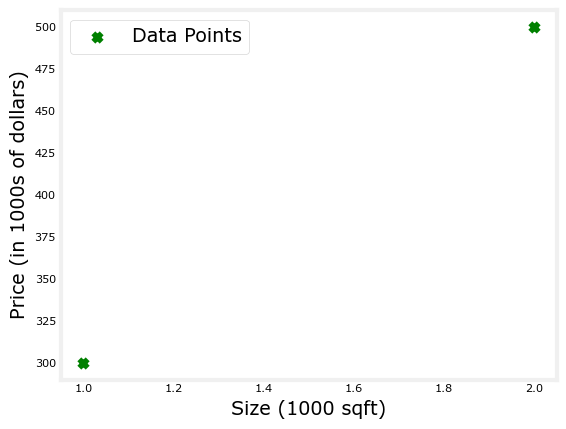

In [3]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)

figure, axis = plt.subplots(1, 1)
axis.scatter(X_train, Y_train, marker="x", color="g", label="Data Points")
axis.legend(fontsize="xx-large")
axis.set_xlabel("Size (1000 sqft)", fontsize="xx-large")
axis.set_ylabel("Price (in 1000s of dollars)", fontsize="xx-large")
plt.show()


### Regression/Linear Model 
The function implemented by a neuron with no activation is the same as linear regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$


We can define a layer with one neuron or unit and compare it to the Linear Regression function we are familiar with

In [4]:
linear_layer = tf.keras.layers.Dense(units=1, activation="linear")

Now we examine the weights

In [5]:
linear_layer.get_weights()

[]

we can see that the weight vector is empty as the weights have not been instantiated. Therefore to instantiate the weights we need to try the model on one example 
within X_train. We must NOTE THAT THE INPUT TO THE LAYER MUST BE 2D, therefore we can reshape our input (features) if required

In [6]:
activation_1 = linear_layer(X_train[0].reshape(1, 1))

print(activation_1)

tf.Tensor([[1.16]], shape=(1, 1), dtype=float32)


We can see that the current result after creating the first activation layer to instantiate the weights results in a tensor being created!



Now let us look at the weights and biases from the activation layer w and b

In [7]:
w, b = linear_layer.get_weights()
print(f"w: {w}, b: {b}")

w: [[1.16]], b: [0.]


Therefore as shown, a linear regression model with a single input feature will have a single weight and bias. This matches the dimensions of our linear_layer above.

Before the weights were set to some random values, now let us try setting it to some known values

In [8]:
w_buffer = np.array([[200]])
b_buffer = np.array([100])

# we now set the weights for the linear layer as set_weights() also accepts array as args
linear_layer.set_weights([w_buffer, b_buffer])

In [9]:
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


we can compare the original equation the layer output to see if the equation works

In [10]:
new_activation_1 = linear_layer(X_train[0].reshape(1, 1))
print(new_activation_1)


computed_linear = np.dot(w_buffer, X_train[0].reshape(1, 1)) + b_buffer # g(x) = wx + b

print(computed_linear)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


now we can create out predictions as we have checked.... we can show how manual predictions vs automated (through the layer itself) predictions work 

In [11]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, w_buffer) + b_buffer

In [12]:
print("W:", w_buffer.shape)
print("training data:", X_train.shape)

W: (1, 1)
training data: (2, 1)


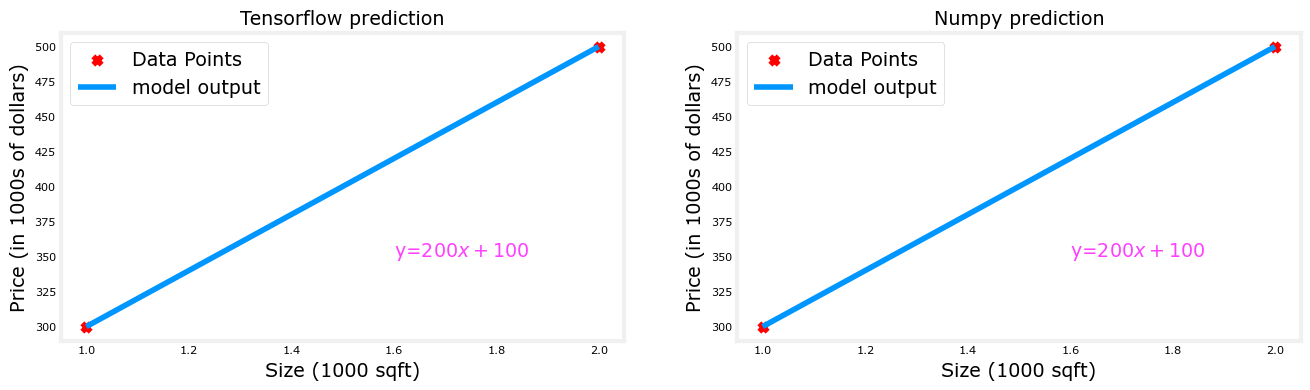

In [13]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

In this case we can see for the Tensorflow prediction , the model has spotted the linear trend 

## Neuron with Sigmoid Activation


The function implemented by a neuron/unit with a sigmoid activation is the same as in Course 1, logistic  regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
where $$g(x) = sigmoid(x)$$ 

Let's set $w$ and $b$ to some known values and check the model.

In [14]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1, 1) # unwrapping from 1d vector into a 2d matrix
Y_train = np.array([0 , 0, 0, 1, 1, 1], dtype=np.float32).reshape(-1, 1) # unwrapping from 1d vector into a 2d matrix

In [15]:
print(X_train)
print()
print(Y_train)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]

[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [16]:
positive = Y_train == 1
negative = Y_train == 0
X_train[positive] # print all inputs that lead to a positive output of 1

array([3., 4., 5.], dtype=float32)

### Now we are creating our sigmoid plot

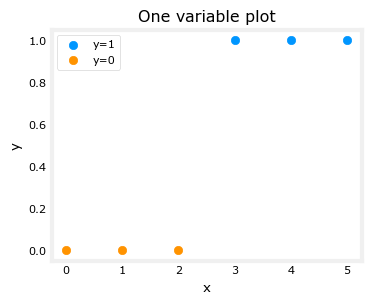

In [17]:
figure, axis = plt.subplots(1, 1, figsize=(4, 3))
axis.scatter(X_train[positive], Y_train[positive], label="y=1")
axis.scatter(X_train[negative], Y_train[negative], label="y=0")

axis.set_xlabel("x")
axis.set_ylabel("y")
axis.set_title("One variable plot")
axis.legend()

plt.show()

## Logistic Neuron


Now let us try to implement a logistic neuron by adding the sigmoid activation function. In Tensorflow-Keras we can do this by creating a logistic layer to show a different method of creating models as Tensorflow is capable of creating multi-layer models. The Sequential model is a convenient example of constructing these models

In [18]:
import keras
from keras import layers

model = keras.Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1, activation="sigmoid", name="L1")
    ]
)

model

c:\Users\zayaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>

`model.summary()` shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters, $w$ and $b$.

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
logistic_layer = model.get_layer("L1")
w, b = logistic_layer.get_weights()

print("w:", w, "b:", b)
print(w.shape, b.shape)

w: [[0.88]] b: [0.]
(1, 1) (1,)


Now to compare, let's set the weight and bias to some known values.

In [21]:
w_set_buffer = np.array([[2]])
b_set_buffer = np.array([-4.5])

In [22]:
activation_1 = model.predict(X_train[0].reshape(1, 1))

print("Network generated Activation (sigmoid):", activation_1)

computed_new_activation = sigmoidnp(np.dot(w_set_buffer, X_train[0].reshape(1, 1)) + b_set_buffer) # g(x) = sigmoid(x) -> sigmoid = 1/1 + e^-x
print("Manual computation of Activation (sigmoid)", computed_new_activation)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Network generated Activation (sigmoid): [[0.5]]
Manual computation of Activation (sigmoid) [[0.01]]


Now we can make predictions on out data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

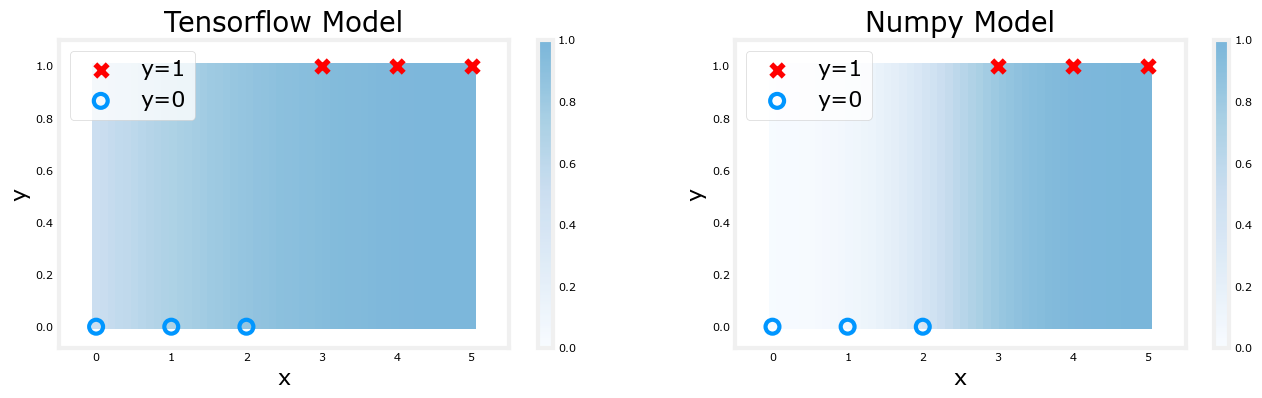

In [23]:
plt_logistic(X_train, Y_train, model, w_set_buffer, b_set_buffer, positive, negative)

### The shading above reflects the output of the sigmoid which varies from 0 to 1.